# Classification_Problem

The dataset inscludes 34 columns which categorized 3,000+ counties in the United States. The columns include total population, percentage of unemployment, percentage of child in poverty, among other variables. This firts attempt to explore poverty in counties classifies the counties using 33 variables.  
Data Source: U.S Census 

In [71]:
#Dependencies 
%matplotlib inline
%matplotlib notebook
import numpy as np
import scipy as sp
import pandas as pd
import sklearn 
import seaborn as sns
from matplotlib import pyplot as plt
%pylab notebook
import sklearn.cross_validation

Populating the interactive namespace from numpy and matplotlib


C:\dev\envs\PythonData\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [72]:
# Read the data
data = pd.read_csv('county_data_2015.csv', index_col=0)
data.head()
data.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,...,3140.000000,3140.000000,3140.00000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.008009e+05,4.959687e+04,5.120403e+04,8.818949,77.308949,8.885064,1.763248,1.252516,0.073567,7.084858e+04,...,3.293981,1.610255,4.69379,23.151115,4.641645e+04,74.453153,17.333312,7.921911,0.291656,7.814682
std,3.231274e+05,1.585590e+05,1.646062e+05,13.491365,19.900840,14.392654,7.337118,2.635657,0.398150,2.075486e+05,...,3.704409,1.654119,3.17841,5.532099,1.514770e+05,7.721348,6.329159,3.933515,0.458442,3.559907
min,2.670000e+02,1.360000e+02,1.310000e+02,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,1.990000e+02,...,0.000000,0.000000,0.00000,4.900000,1.660000e+02,29.500000,5.800000,0.000000,0.000000,0.000000
25%,1.103550e+04,5.550750e+03,5.487750e+03,1.900000,65.675000,0.600000,0.100000,0.200000,0.000000,8.276250e+03,...,1.400000,0.900000,2.80000,19.300000,4.532000e+03,70.900000,13.075000,5.400000,0.100000,5.500000
50%,2.579300e+04,1.283800e+04,1.291550e+04,3.700000,84.650000,2.100000,0.300000,0.500000,0.000000,1.945450e+04,...,2.400000,1.300000,4.00000,22.900000,1.065700e+04,75.850000,16.100000,6.900000,0.200000,7.500000
75%,6.762050e+04,3.332750e+04,3.412275e+04,9.000000,93.325000,10.200000,0.600000,1.200000,0.000000,5.079525e+04,...,4.000000,1.900000,5.70000,26.600000,2.927150e+04,79.800000,20.100000,9.400000,0.300000,9.700000
max,1.003839e+07,4.945351e+06,5.093037e+06,98.700000,99.800000,85.900000,92.100000,41.600000,11.100000,6.046749e+06,...,71.200000,39.100000,37.20000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,29.400000


In [73]:
data.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [74]:
data = data.drop('State', axis =1)

In [39]:
data = data.drop('County', axis =1)

In [40]:
data.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusId,,,,,,,,,,,,,,,,,,,,,
1001,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
1009,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [67]:
#data.columns

For a classification problem, 
Feature data: usually labeled as X. 
Target data, labeled Y. Y is a vector which contains the class of all datapoints.
Every row in the matrix X is a datapoint (i.e. a county) and every column in X is a feature of the data (e.g. poverty). 

The target variable will be unemployment column. This, I am going to save it in the unemploymentcolumn as a separate numpy array (labeled Y). Finally, I will remove/drop the unemployment column from the dataframe.

In [42]:
Y = data.Unemployment.values
data = data.drop('Unemployment', axis =1)
# To make the problem more simple its determined as a binary one. 
#5 is obtained from the mean of the Y(original) column 
Y = np.asarray([1 if i>=5 else 0 for i in Y])

In [43]:
X = data.as_matrix()

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [45]:
scores = []
# n_estimators = # of trees
for val in range(1,5):
    clf = RandomForestClassifier(n_estimators = val)
    validated = cross_val_score(clf, X, Y, cv = 10)
    scores.append(validated)

<IPython.core.display.Javascript object>


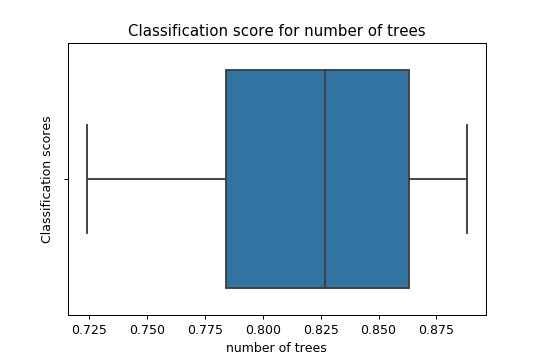

In [58]:
sns.boxplot(scores)
plt.xlabel('number of trees')
plt.ylabel('Classification scores')
plt.title('Classification score for number of trees')
plt.show()

In [59]:
#2 trees
clf = RandomForestClassifier(n_estimators = 2)
validated = cross_val_score(clf, X, Y, cv = 10)
validated

array([0.78095238, 0.7968254 , 0.72380952, 0.80254777, 0.86942675,
       0.77388535, 0.82802548, 0.84345048, 0.7284345 , 0.74440895])

<IPython.core.display.Javascript object>


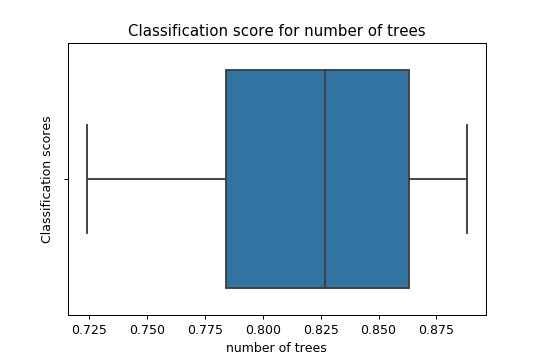

In [60]:
sns.boxplot(scores)
plt.xlabel('number of trees')
plt.ylabel('Classification scores')
plt.title('Classification score for number of trees')
plt.show()

In [61]:
scores = []
# n_estimators = # of trees
for val in range(1,20):
    clf = RandomForestClassifier(n_estimators = val)
    validated = cross_val_score(clf, X, Y, cv = 10, scoring = 'f1')
    scores.append(validated)

<IPython.core.display.Javascript object>


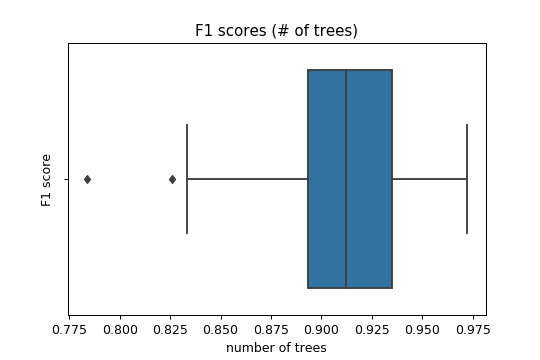

In [68]:
sns.boxplot(scores)
plt.xlabel('number of trees')
plt.ylabel('F1 score')
plt.title('F1 scores (# of trees)')
plt.show()

In [62]:
from sklearn import tree
import pandas as pd
import pylab as pl

In [63]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [64]:
clf.feature_importances_

array([0.00578028, 0.00395063, 0.02407176, 0.04226158, 0.01979491,
       0.01122947, 0.01299057, 0.00972829, 0.00413648, 0.04416265,
       0.03207877, 0.04037254, 0.04277064, 0.01923709, 0.05008345,
       0.10716802, 0.02904618, 0.02355377, 0.01786339, 0.01847129,
       0.00780664, 0.01161236, 0.0152243 , 0.00869292, 0.02351327,
       0.0258119 , 0.01213756, 0.09169774, 0.00511439, 0.01724889,
       0.02523112, 0.18372498, 0.01343216])

In [65]:
#data.columns.values

In [75]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names= data.columns,  
    class_names=["small", "large"],  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('dtree.png')

graph = graphviz.Source(dot_data)  
graph 

TypeError: <function clf at 0x00000166AF4E38C8> is not an estimator instance.

# Random_Forest

In [70]:
clf = RandomForestClassifier(n_estimators = 15)
clf.fit(X,Y)

(clf.predict_proba)(X)[:,1]>0.5.astype(int)

AttributeError: 'float' object has no attribute 'astype'